In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

scanpy==1.4.3 anndata==0.6.19 umap==0.3.8 numpy==1.16.3 scipy==1.2.1 pandas==0.24.2 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
adata = sc.read_h5ad('/home/jorvis/git/gEAR/www/datasets/1b12dde9-1762-7564-8fbd-1b07b750505f.h5ad')
adata.obsm['X_tsne'] = ad.base.BoundRecArr(input_array=adata.obs[['tSNE_1', 'tSNE_2']].values, parent=adata, attr='obsm')
genes_to_color = ['Pou4f3',]
adata.var = adata.var.reset_index().set_index('gene_symbol')

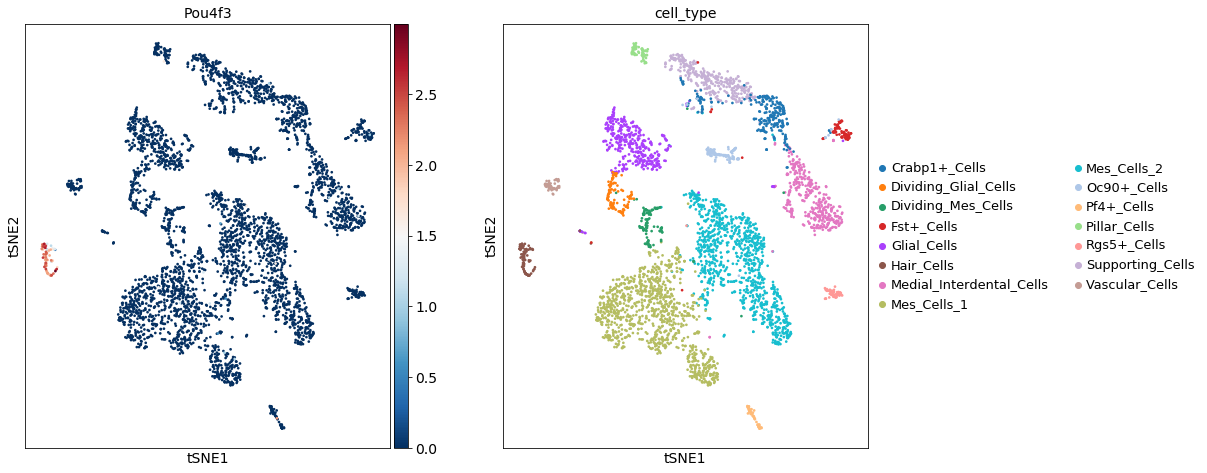

In [5]:
# the figsize options here (paired with dpi spec above) dramatically affect the definition of the image
fig = plt.figure(figsize=(15, 7.5))
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1.1, 1])

f1 = fig.add_subplot(spec[0,0])
f2 = fig.add_subplot(spec[0,1])

sc.pl.tsne(adata, color=genes_to_color, color_map='RdBu_r', show=False, ax=f1)
sc.pl.tsne(adata, color=['cell_type'], show=False, ax=f2)
